In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('placement.csv', index_col=0)

In [4]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [6]:
df['cgpa'].nunique()

39

In [7]:
df['cgpa'].unique()

array([6.8, 5.9, 5.3, 7.4, 5.8, 7.1, 5.7, 5. , 6.1, 5.1, 6. , 6.9, 5.4,
       6.4, 5.2, 3.3, 4. , 6.6, 4.9, 4.7, 7. , 7.6, 3.9, 4.8, 8.1, 6.5,
       4.6, 7.5, 3.5, 8.3, 7.8, 8. , 7.3, 6.3, 8.5, 6.7, 4.4, 4.3, 6.2])

In [8]:
df['cgpa'].value_counts()

4.9    6
5.2    5
6.1    5
7.0    5
6.0    5
6.8    4
7.3    4
6.5    4
5.7    4
4.8    4
5.4    4
6.3    3
7.5    3
4.7    3
5.0    3
6.9    3
5.1    3
6.4    2
5.3    2
5.8    2
6.7    2
7.1    2
8.1    2
4.4    2
7.6    2
6.6    2
4.0    2
8.0    1
4.3    1
8.5    1
7.4    1
4.6    1
7.8    1
8.3    1
3.5    1
3.3    1
3.9    1
5.9    1
6.2    1
Name: cgpa, dtype: int64

In [9]:
len(df['cgpa'].value_counts())

39

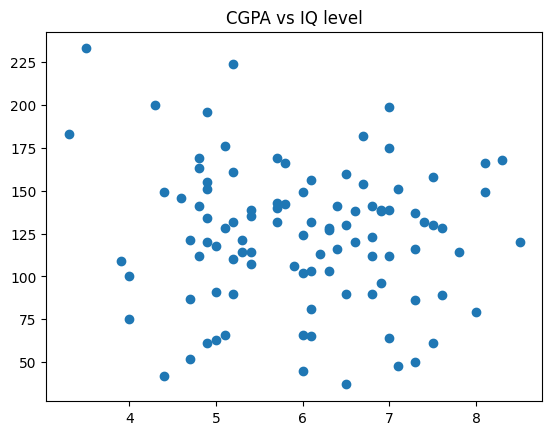

In [10]:
plt.title('CGPA vs IQ level')
plt.scatter(df['cgpa'], df['iq'])
plt.show()

In [11]:
df['iq'].min()

37.0

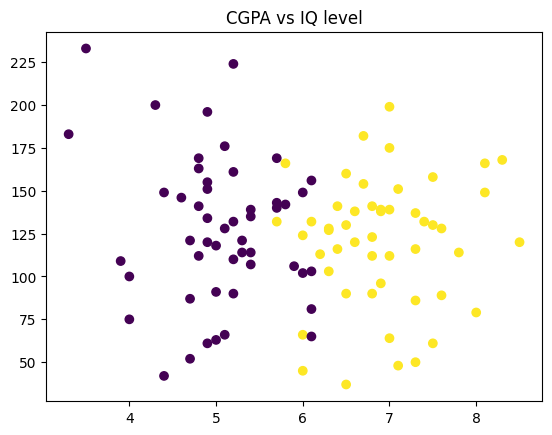

In [12]:
plt.title('CGPA vs IQ level')
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.show()

In [13]:
x = df.drop(columns=['placement'])
y = df['placement']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [15]:
len(x_train)

80

In [16]:
x_test

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
62,6.0,102.0
76,4.9,155.0
37,8.1,149.0
99,6.2,113.0
78,6.1,81.0
38,6.5,160.0
2,5.3,121.0
84,5.7,169.0


In [17]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_train

array([[ 0.04574698, -1.39623723],
       [-0.72024904, -1.39623723],
       [ 0.556411  , -0.06678058],
       [-1.6564664 , -0.55917193],
       [-0.89047038, -1.51933507],
       [-0.63513837,  0.22865423],
       [-0.80535971, -0.78074804],
       [ 0.98196435,  0.69642602],
       [ 0.30107899,  0.1055564 ],
       [-1.06069172, -0.87922631],
       [ 0.64152167,  1.45963262],
       [ 1.15218569, -0.90384588],
       [ 0.89685368, -0.26373712],
       [-0.80535971, -0.11601971],
       [ 0.98196435, -1.83938945],
       [ 0.47130033, -2.11020469],
       [-0.63513837, -0.80536761],
       [ 0.72663234,  0.45023034],
       [ 0.30107899,  0.13017596],
       [ 0.81174301, -0.6576502 ],
       [ 1.32240703, -1.51933507],
       [-2.08201975,  2.71523057],
       [ 1.74796037, -1.07618285],
       [ 1.57773903, -0.21449798],
       [-1.31602373, -1.98710686],
       [ 0.04574698,  0.03169769],
       [-1.14580239,  0.57332818],
       [-0.89047038, -0.06678058],
       [-0.89047038,

In [18]:
x_test = scalar.transform(x_test)
x_test

array([[ 0.72663234,  0.00707813],
       [-0.03936368, -0.41145452],
       [ 0.04574698, -0.5099328 ],
       [-0.89047038,  0.79490429],
       [ 1.83307104,  0.64718689],
       [ 0.21596832, -0.23911755],
       [ 0.13085765, -1.02694372],
       [ 0.47130033,  0.91800213],
       [-0.5500277 , -0.04216101],
       [-0.20958502,  1.13957824],
       [ 0.81174301,  0.40099121],
       [ 0.89685368,  1.87816527],
       [ 2.17351372, -0.06678058],
       [ 0.04574698,  0.64718689],
       [-0.97558105,  0.45023034],
       [-0.12447435,  0.47484991],
       [-0.63513837, -0.31297625],
       [-0.80535971, -1.47009593],
       [ 0.04574698, -1.91324815],
       [ 0.64152167,  0.77028472]])

In [19]:
df['iq'].mean()

123.58

In [20]:
df['iq'].std()

39.944198451076595

In [21]:
clf = LogisticRegression()
clf

LogisticRegression()

In [22]:
clf.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [24]:
pd.DataFrame({'y_test' : y_test, 'y_predict' : y_pred})

,y_test,y_predict
0,1,1
1,0,1
62,0,1
76,0,0
37,1,1
99,1,1
78,0,1
38,1,1
2,0,0
84,0,0


In [25]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.8


In [26]:
print('Precision score: ',precision_score(y_test,y_pred))

Precision score:  0.6923076923076923


In [27]:
print('Recall score: ',recall_score(y_test,y_pred))

Recall score:  1.0


In [28]:
print('F1 score: ',f1_score(y_test,y_pred))

F1 score:  0.8181818181818181


In [29]:
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))

Confusion Matrix:  [[7 4]
 [0 9]]


In [30]:
print('Classification Report: ',classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.69      1.00      0.82         9

    accuracy                           0.80        20
   macro avg       0.85      0.82      0.80        20
weighted avg       0.86      0.80      0.80        20



<Axes: >

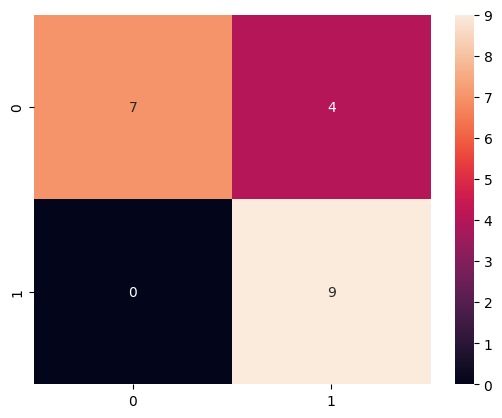

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

<Axes: >

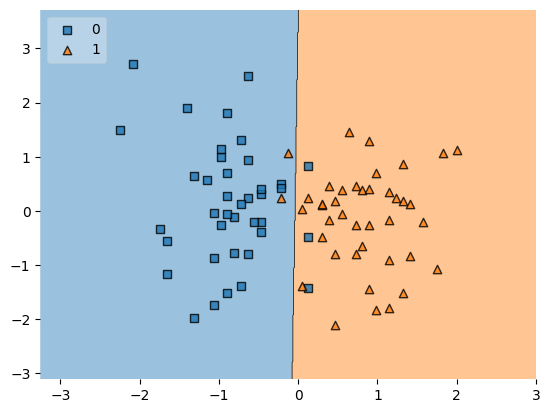

In [33]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

<Axes: >

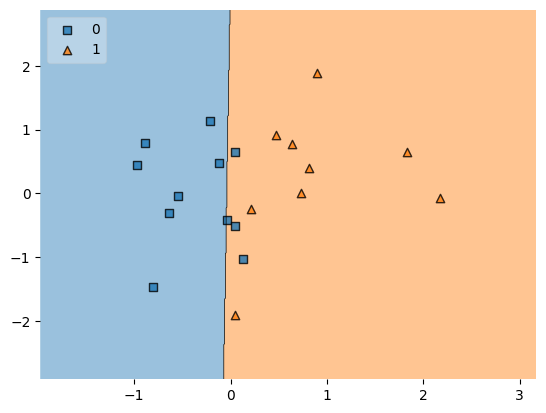

In [34]:
plot_decision_regions(x_test, y_test.values, clf=clf, legend=2)